# CUSTOMER DATA PROCESSING

## DATA PROCESSING

#### Using standard python (No pandas / seaborn) with default libraries (os, sys, time, json, csv, …) you have been given the following tasks: 
    
### Question 1
Read in the provided ACW Data using the CSV library.

In [1]:
#Importing my Libraries

import numpy as np
import json
import csv

In [2]:
# Reading of the acw_user_data and catching any possible errors
data = []
try:
    with open("acw_user_data.csv", mode = 'r') as data_obtained:
        readed_data = csv.reader(data_obtained, delimiter = ',')
        for row in readed_data:
            data.append(row)            
except Exception as ex:
    print(f'The error that occurred is {ex}')
print(data)

[['Address Street', 'Address City', 'Address Postcode', 'Age (Years)', 'Distance Commuted to Work (Km)', 'Employer Company', 'Credit Card Start Date', 'Credit Card Expiry Date', 'Credit Card Number', 'Credit Card CVV', 'Dependants', 'First Name', 'Bank IBAN', 'Last Name', 'Marital Status', 'Yearly Pension (GBP)', 'Retired', 'Yearly Salary (GBP)', 'Sex', 'Vehicle Make', 'Vehicle Model', 'Vehicle Year', 'Vehicle Type'], ['70 Lydia isle', 'Lake Conor', 'S71 7XZ', '89', '0', 'N/A', '08/18', '11/27', '676373692463', '875', '3', 'Kieran', 'GB62PQKB71416034141571', 'Wilson', 'married or civil partner', '7257', 'True', '72838', 'Male', 'Hyundai', 'Bonneville', '2009', 'Pickup'], ['00 Wheeler wells', 'Chapmanton', 'L2 7BT', '46', '13.72', 'Begum-Williams', '08/12', '11/26', '4529436854129855', '583', '1', 'Jonathan', 'GB37UMCO54540228728019', 'Thomas', 'married or civil partner', '0', 'False', '54016', 'Male', 'Nissan', 'ATS', '1996', 'Coupe'], ['Studio 33K Joel walk', 'Randallborough', 'ME3N 1

### Question 2
As a CSV file is an entirely flat file structure, we need to convert our data back into its rich structure. Convert all flat structures into nested structures. These are notably: 
        a. Vehicle - consists of make, model, year, and type 
        b. Credit Card - consists of start date, end date, number, security code, and IBAN. 
        c. Address - consists of the main address, city, and postcode. 

    For this task, it may be worthwhile inspecting the CSV headers to see which data columns may correspond to these above. 
Note: Ensure that the values read in are appropriately cast to their respective types.

##### CONVERTING FLAT STRUCTURES TO NESTED STRUCTURES

In [3]:
# Visualizing the headers names for easy reference
headers = data[0]
features_dict = {}

for index, column_name in enumerate(headers):
    print(f'At Index {index} -> {column_name}')
    features_dict[column_name] = index 

At Index 0 -> Address Street
At Index 1 -> Address City
At Index 2 -> Address Postcode
At Index 3 -> Age (Years)
At Index 4 -> Distance Commuted to Work (Km)
At Index 5 -> Employer Company
At Index 6 -> Credit Card Start Date
At Index 7 -> Credit Card Expiry Date
At Index 8 -> Credit Card Number
At Index 9 -> Credit Card CVV
At Index 10 -> Dependants
At Index 11 -> First Name
At Index 12 -> Bank IBAN
At Index 13 -> Last Name
At Index 14 -> Marital Status
At Index 15 -> Yearly Pension (GBP)
At Index 16 -> Retired
At Index 17 -> Yearly Salary (GBP)
At Index 18 -> Sex
At Index 19 -> Vehicle Make
At Index 20 -> Vehicle Model
At Index 21 -> Vehicle Year
At Index 22 -> Vehicle Type


In [4]:
data = data[1:]
print(len(data))

1000


In [5]:
# Eliminating the headers from the original data
#data = data[1:]
# Creating a function to help convert flat structure to nested structure
def flat_to_nested(raw_file,purpose):
    users = []
    problematic_rows = []
    for index, data in enumerate(raw_file):
        
        # creating nested objects
        Vehicle = {}
        Credit_Card = {}
        Address = {}
        
        # individual object
        user = {}
        
        user['first_name'] = data[features_dict['First Name']]
        user['second_name'] = data[features_dict['Last Name']]
        user['age'] = int(data[features_dict['Age (Years)']])
        user['sex'] = data[features_dict['Sex']]
        
        # Using tenary operator to simplify code
        user['retired'] = True if data[features_dict['Retired']] == 'True' else False
        # user['retired'] = data[features_dict['Retired']]
        user['marital_status'] = data[features_dict['Marital Status']]
        try:
            user['dependents'] = int(data[features_dict['Dependants']])
        except:
            # This is to store the rows with issue from the except block
            problematic_rows.append(index+2) # Adding two because the headers were removed and array is zero based index
            
            user['dependents'] = 0 
        user['salary'] = int(data[features_dict['Yearly Salary (GBP)']])
        user['pension'] = int(data[features_dict['Yearly Pension (GBP)']])
        user['company'] = data[features_dict['Employer Company']]
        user['commute_distance'] = round(float(data[features_dict['Distance Commuted to Work (Km)']]),2)
        
        # assign vehicle properties
        Vehicle['make'] = data[features_dict['Vehicle Make']]
        Vehicle['model'] = data[features_dict['Vehicle Model']]
        Vehicle['year'] = data[features_dict['Vehicle Year']]
        Vehicle['category'] = data[features_dict['Vehicle Type']]
        
        Credit_Card['start_date'] = data[features_dict['Credit Card Start Date']]
        Credit_Card['end_date'] = data[features_dict['Credit Card Expiry Date']]
        Credit_Card['number'] = int(data[features_dict['Credit Card Number']])
        Credit_Card['cvv'] = int(data[features_dict['Credit Card CVV']])
        Credit_Card['iban'] = data[features_dict['Bank IBAN']]
        
        Address['street'] = data[features_dict['Address Street']]
        Address['city'] = data[features_dict['Address City']]
        Address['postcode'] = data[features_dict['Address Postcode']]
        
        user['Vehicle'] = Vehicle
        user['Credit Card'] = Credit_Card
        user['Address'] = Address
        a = user['first_name']
        # print(f'index {index} {a}')
        users.append(user) 
        # print(index)
    if purpose == 'problems':
        return problematic_rows
    else:
        return users

In [6]:
# Use the flat_to_nested function created earlier to convert csv file structure to the desired format
nested_data = flat_to_nested(data,'users')
print(len(nested_data))

1000


In [7]:
# Inspect new nested structure
nested_data

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependents': 3,
  'salary': 72838,
  'pension': 7257,
  'company': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependents': 1,
  'salary': 54016,
  'pension': 0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'},
  'Credit Card': {'start_date': '08/12',


### Question 3
The client informs you that they have had difficulty with errors in the dependants 
column. Some entries are empty (i.e. “ “ or “”), which may hinder your conversion 
from Task 2. These should be changed into something meaningful when 
encountered. 
Print a list where all such error corrections take place. 
E.g. Problematic rows for dependants: [16, 58, 80, 98]

##### PROBLEMATIC ROWS

In [8]:
# The problematic_rows have been factored in question 2 when converting the data structure from flat to nested
# Refer to question 2 for logic behind problematic_rows

problematic_rows = flat_to_nested(data,'problems')
print("The problematic rows are:", problematic_rows)
print("Total number of problematic rows =", len(problematic_rows))

The problematic rows are: [23, 111, 181, 207, 272, 274, 276, 360, 462, 470, 581, 638, 681, 727, 824, 867, 919, 933, 985]
Total number of problematic rows = 19


### Question 4
Write all records to a processed.json file in the JSON data format. This should be a
list of dictionaries, where each index of the list is a dictionary representing a singular 
person.

##### WRITING INTO JSON FILE

In [9]:
# function(convertToJson) to create json file 

def convertToJson(items,name):
    with open(name, mode = 'w') as writingFile:
        json.dump(items, writingFile)

In [10]:
# Use function created above to convert nested_data to a json file

convertToJson(nested_data,'processed.json')

print("The nested_data (processed.json) has been created successfully")

The nested_data (processed.json) has been created successfully


### Question 5
You should create two additional file outputs, retired.json and employed.json,
these should contain all retired customers (as indicated by the retired field in the 
CSV), and all employed customers respectively (as indicated by the employer field in 
the CSV) and be in the JSON data format. 

##### RETIRED AND EMPLOYED CUSTOMERS

In [11]:
# Note that the convertToJson function has been created earlier in the previous question and will be recalled below
# Use the retired column to check the retirement status

try:
    with open('processed.json', mode = 'r') as opening_file:
        processed_customers = json.load(opening_file)
        retired_list = []
        employed_list = []
        for customer in processed_customers:
            retired_list.append(customer) if customer['retired'] == True else employed_list.append(customer)
        convertToJson(retired_list,'retired.json')
        convertToJson(employed_list,'employed.json')
except Exception as e:
    print(f'An error of {e} occurred!')
print("Total number of retired customers:", len(retired_list))
print("Total number of employed customers:", len(employed_list))

Total number of retired customers: 246
Total number of employed customers: 754


In [12]:
# Inspect retired list

retired_list

[{'first_name': 'Kieran',
  'second_name': 'Wilson',
  'age': 89,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'married or civil partner',
  'dependents': 3,
  'salary': 72838,
  'pension': 7257,
  'company': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Hyundai',
   'model': 'Bonneville',
   'year': '2009',
   'category': 'Pickup'},
  'Credit Card': {'start_date': '08/18',
   'end_date': '11/27',
   'number': 676373692463,
   'cvv': 875,
   'iban': 'GB62PQKB71416034141571'},
  'Address': {'street': '70 Lydia isle',
   'city': 'Lake Conor',
   'postcode': 'S71 7XZ'}},
 {'first_name': 'Clive',
  'second_name': 'Evans',
  'age': 67,
  'sex': 'Male',
  'retired': True,
  'marital_status': 'single',
  'dependents': 1,
  'salary': 27964,
  'pension': 28075,
  'company': 'N/A',
  'commute_distance': 0.0,
  'Vehicle': {'make': 'Volvo',
   'model': 'Express 3500 Passenger',
   'year': '2013',
   'category': 'SUV'},
  'Credit Card': {'start_date': '07/15',
   'end_date': '

In [13]:
# Inspect employed list
employed_list

[{'first_name': 'Jonathan',
  'second_name': 'Thomas',
  'age': 46,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependents': 1,
  'salary': 54016,
  'pension': 0,
  'company': 'Begum-Williams',
  'commute_distance': 13.72,
  'Vehicle': {'make': 'Nissan',
   'model': 'ATS',
   'year': '1996',
   'category': 'Coupe'},
  'Credit Card': {'start_date': '08/12',
   'end_date': '11/26',
   'number': 4529436854129855,
   'cvv': 583,
   'iban': 'GB37UMCO54540228728019'},
  'Address': {'street': '00 Wheeler wells',
   'city': 'Chapmanton',
   'postcode': 'L2 7BT'}},
 {'first_name': 'Antony',
  'second_name': 'Jones',
  'age': 22,
  'sex': 'Male',
  'retired': False,
  'marital_status': 'married or civil partner',
  'dependents': 1,
  'salary': 68049,
  'pension': 0,
  'company': 'Hill-Wright',
  'commute_distance': 16.02,
  'Vehicle': {'make': 'GMC',
   'model': 'Achieva',
   'year': '2015',
   'category': 'Convertible, Coupe'},
  'Credit Card': {'star

### Question 6
The client states that there may be some issues with credit card entries. Any 
customers that have more than 10 years between their start and end date need 
writing to a separate file, called remove_ccard.json, in the JSON data format. The
client will manually deal with these later based on your output. They request that you 
write a function to help perform this, which accepts a single row from the CSV data, 
and outputs whether the row should be flagged. This can then be used when 
determining whether to write the current person to the remove_ccard file. 


##### REMOVE INVALID CARDS

In [14]:
# Create function to check card status

def invalidCardChecker(cardDetails):
    credit_card_start_date = cardDetails['start_date']
    credit_card_end_date = cardDetails['end_date']
    
    credit_card_start_month, credit_card_start_year = credit_card_start_date.split('/')
    credit_card_end_month, credit_card_end_year = credit_card_end_date.split('/')
    
    card_remaining_years = int(credit_card_end_year) - int(credit_card_start_year)
    
    if int(credit_card_start_month) > int(credit_card_end_month):
        card_remaining_years = card_remaining_years - 1
    if card_remaining_years > 10:
        return True
    return False

In [15]:
# Using the function created above create a list of the invalid cards and convert to json afterwards

invalid_customer_credit_card = []
for customer in processed_customers:
    card_details = customer['Credit Card']
    if invalidCardChecker(card_details) == True:
        invalid_customer_credit_card.append(customer)

print("Length of invalid customer credit card list:",len(invalid_customer_credit_card))
print("The remove_ccard.json has been created successfully")

convertToJson(invalid_customer_credit_card,'remove_ccard.json')

Length of invalid customer credit card list: 193
The remove_ccard.json has been created successfully


### Question 7
You have been tasked with calculating some additional metrics which will be used for 
ranking customers. You should create a new data attribute for our customers called 
“Salary-Commute”. Reading in from processed.json: 
   
   a. Add, and calculate appropriately, this new attribute. It should represent the Salary that a customer earns, per mile of their commute. (i.) Note: If a person travels 1 or fewer commute Km, then their salary commute would be just their salary. 
   
   b. Sort these records by that new metric, in ascending order. 
   
   c. Store the output file out as a JSON format, for a commute.json file.

##### SALARY COMMUTE

In [16]:
# Creating copy of processed_customers for new modification required

copy_processed_customers = processed_customers

#Calculating the new attribute
for customer in processed_customers:
    if customer['commute_distance'] > 1:
        salary_commute = customer['salary'] / customer['commute_distance']
        customer['Salary-Commute'] = salary_commute
    else:
        customer['Salary-Commute'] = customer['salary']
        
#Sorting in ascending order
copy_processed_customers.sort(key = lambda x:x['Salary-Commute'])

#Storing the output file as Json
convertToJson(copy_processed_customers,'commute.json')
print("The commute.json has been created successfully")

The commute.json has been created successfully


## DATA VISUALIZATION

Using Pandas and Seaborn. 

Your client wishes to understand the data they have on their customers a bit more by use of 
visualisations. With use of Pandas and Seaborn read in the original CSV file provided with
the assignment.

In [17]:
#Importing my libraries

import pandas as pd
import seaborn as sns

In [18]:
#Reading in my file

df = pd.read_csv('./acw_user_data.csv')

# Inspecting Dataframe

df

,Address Street,Address City,Address Postcode,Age (Years),Distance Commuted to Work (Km),Employer Company,Credit Card Start Date,Credit Card Expiry Date,Credit Card Number,Credit Card CVV,...,Last Name,Marital Status,Yearly Pension (GBP),Retired,Yearly Salary (GBP),Sex,Vehicle Make,Vehicle Model,Vehicle Year,Vehicle Type
0,70 Lydia isle,Lake Conor,S71 7XZ,89,0.00,NaN,08/18,11/27,676373692463,875,...,Wilson,married or civil partner,7257,True,72838,Male,Hyundai,Bonneville,2009,Pickup
1,00 Wheeler wells,Chapmanton,L2 7BT,46,13.72,Begum-Williams,08/12,11/26,4529436854129855,583,...,Thomas,married or civil partner,0,False,54016,Male,Nissan,ATS,1996,Coupe
2,Studio 33K Joel walk,Randallborough,ME3N 1GH,22,16.02,Hill-Wright,11/19,07/27,4091726363083888495,422,...,Jones,married or civil partner,0,False,68049,Male,GMC,Achieva,2015,"Convertible, Coupe"
3,Studio 46S Bethany lights,East Reece,E10 9RJ,56,19.35,Green LLC,10/17,04/18,4671332769487632633,669,...,Shaw,married or civil partner,0,False,91337,Male,Scion,F150 SuperCrew Cab,1994,Pickup
4,Flat 3 Christine views,Fletcherstad,WS2 9SN,57,5.94,"Hill, Evans and Harrison",04/19,11/27,2245094149128526,659,...,O'Brien,married or civil partner,0,False,18446,Female,Buick,Outback,2020,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Studio 6 Heather prairie,North Amelia,E9 0HB,48,18.44,Phillips-Pope,04/19,08/26,3563802099155576,908,...,Clark,married or civil partner,0,False,84645,Male,Saturn,Convertible,2015,Van/Minivan
996,Flat 3 Davies run,Greenshire,E7 4UJ,22,19.61,Hughes LLC,05/12,07/28,3591311819315276,675,...,Jones,married or civil partner,0,False,93314,Female,Toyota,Yukon,2015,Van/Minivan
997,Flat 7 Barber motorway,Burrowsshire,L62 8TA,38,6.66,Bailey Group,01/13,05/29,3584931475767707,679,...,Walker,single,0,False,20940,Female,Ford,S6,2020,Sedan
998,00 Tony forks,Abbiebury,NP4 1JL,45,18.13,Foster-Price,04/19,05/23,4090311300716168,775,...,Thomson,married or civil partner,0,False,82412,Male,Scion,Ram 1500 Quad Cab,2015,Pickup


### Question 1. 
Obtain the Data Series for Salary, and Age, and calculate the following: 

    a. Mean Salary 

    b. Median Age

In [19]:
#Obtaining my data series

Salary = df['Yearly Salary (GBP)']
print(type(Salary))
print(Salary)

<class 'pandas.core.series.Series'>
0      72838
1      54016
2      68049
3      91337
4      18446
       ...  
995    84645
996    93314
997    20940
998    82412
999    25788
Name: Yearly Salary (GBP), Length: 1000, dtype: int64


In [20]:
#Obtaining my data series

Age = df['Age (Years)']
print(type(Age))
print(Age)

<class 'pandas.core.series.Series'>
0      89
1      46
2      22
3      56
4      57
       ..
995    48
996    22
997    38
998    45
999    80
Name: Age (Years), Length: 1000, dtype: int64


In [21]:
#Mean Salary

Mean_salary = Salary.mean()
print("Mean salary:", Mean_salary)

Mean salary: 57814.078


In [22]:
#Median Age

Median_age = Age.median()
print("Median Age:", Median_age)

Median Age: 54.0


### Question 2
Perform univariate plots of the following data attributes: 
    
    a. Age, calculating how many bins would be required for a bin_width of 5. 
    
    b. Dependents, fixing data errors with seaborn itself. 
    
    c. Age (of default bins), conditioned on Marital Status

##### a. AGE PLOT

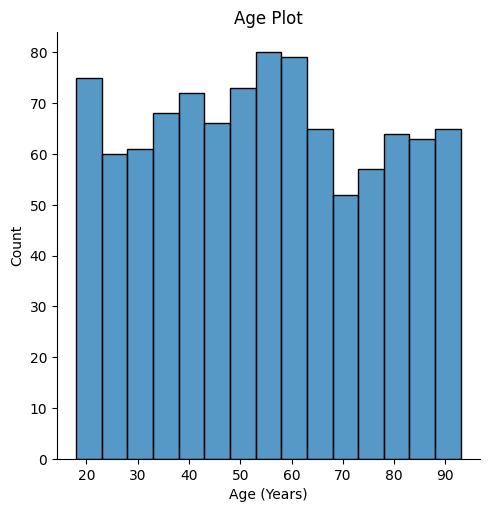

In [23]:
# Plotting age with bin_width of 5 
Age_plot = sns.displot(data=df, x = 'Age (Years)', binwidth = 5)

# Add axis labels to the plot
Age_plot.set_axis_labels(x_var="Age (Years)", y_var="Count")

# Add a title to the plot
Age_plot.set(title='Age Plot')


#After specifying binwidth to be 5, number of bins produced is 15.


In [24]:
print("The number of bins required for a bin_width of 5 is 15")

The number of bins required for a bin_width of 5 is 15


##### b. DEPENDANTS

In [25]:
# Viewing null counts for each column in the dataframe

df.info()

#Output shows that the data for employer company and dependents is incomplete


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Address Street                  1000 non-null   object 
 1   Address City                    1000 non-null   object 
 2   Address Postcode                1000 non-null   object 
 3   Age (Years)                     1000 non-null   int64  
 4   Distance Commuted to Work (Km)  1000 non-null   float64
 5   Employer Company                754 non-null    object 
 6   Credit Card Start Date          1000 non-null   object 
 7   Credit Card Expiry Date         1000 non-null   object 
 8   Credit Card Number              1000 non-null   int64  
 9   Credit Card CVV                 1000 non-null   int64  
 10  Dependants                      981 non-null    float64
 11  First Name                      1000 non-null   object 
 12  Bank IBAN                       100

In [26]:
# Focus is on Dependents, inspect unique values for dependents

print(df['Dependants'].unique()) #Check for Unique Data

[ 3.  1.  2.  4. nan  5.]


In [27]:
# Replacing null entres in the dependants column with the mode of the column

df['Dependants'] = df['Dependants'].fillna(df['Dependants'].mode().values[0])

In [28]:
# Double check to be sure the null values have been fixed.

print(df['Dependants'].unique())

[3. 1. 2. 4. 5.]


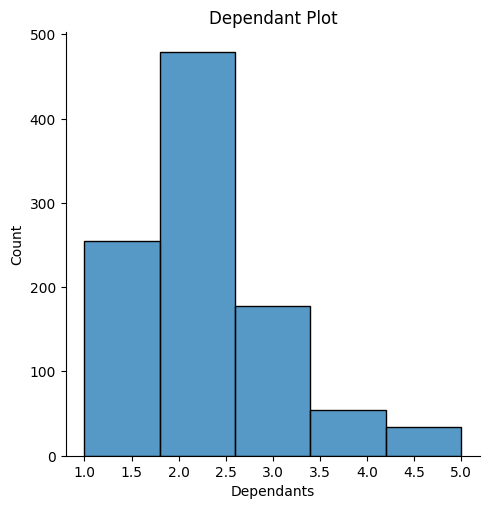

In [29]:
# Plot dependant graph now that null entries have been dealt with 
Dependants_plot = sns.displot(data=df, x = 'Dependants',bins = 5)

# Add axis labels to the plot
Dependants_plot.set_axis_labels(x_var="Dependants", y_var="Count")

# Add a title to the plot
Dependants_plot.set(title='Dependant Plot')


##### c. AGE CONDITIONED ON MARITAL STATUS

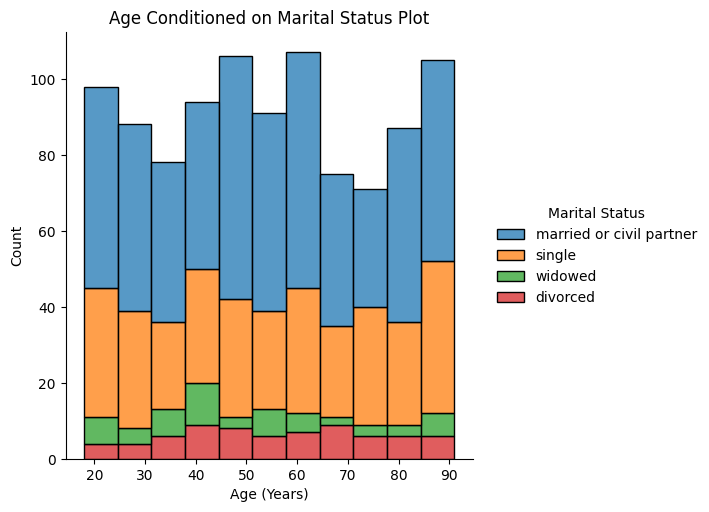

In [30]:
# Plot for age conditioned on marital status

Age_Maritalstatus_plot = sns.displot(data=df, x = 'Age (Years)', hue = 'Marital Status', multiple ='stack' )

# Add axis labels to the plot
Age_Maritalstatus_plot.set_axis_labels(x_var="Age (Years)", y_var="Count")

# Add a title to the plot
Age_Maritalstatus_plot.set(title='Age Conditioned on Marital Status Plot')

### Question 3
Perform multivariate plots with the following data attributes: 
    
    a. Commuted distance against salary. 
    
    b. Age against Salary 
    
    c. Age against Salary conditioned by Dependants

##### a. COMMUTED DISTANCE AGAINST SALARY

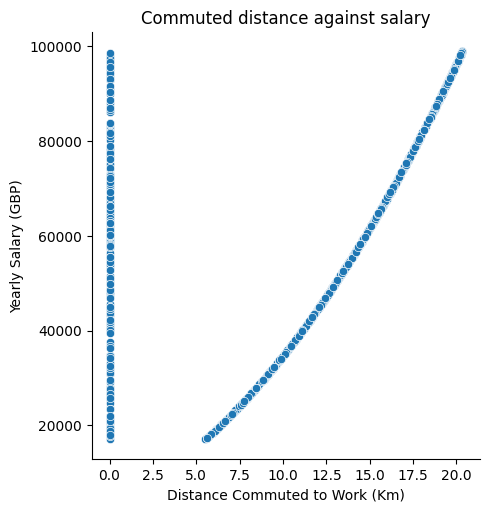

In [31]:
# Plot multivariate graph
Distance_salary_plot = sns.relplot(data = df, x = "Distance Commuted to Work (Km)", y = "Yearly Salary (GBP)")

# Add axis labels to the plot
Distance_salary_plot.set_axis_labels(x_var="Distance Commuted to Work (Km)", y_var="Yearly Salary (GBP)")

# Add a title to the plot
Distance_salary_plot.set(title='Commuted distance against salary')

##### b. AGE AGAINST SALARY

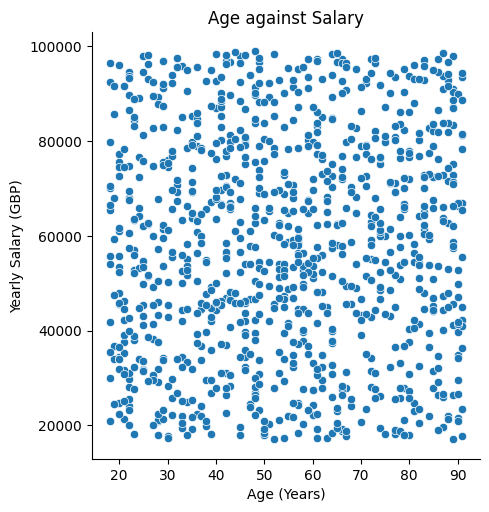

In [32]:
# Plot multivariate graph
Age_salary_plot = sns.relplot(data = df, x = "Age (Years)", y = "Yearly Salary (GBP)")

# Add axis labels to the plot
Age_salary_plot.set_axis_labels(x_var="Age (Years)", y_var="Yearly Salary (GBP)")

# Add a title to the plot
Age_salary_plot.set(title='Age against Salary')

##### c. AGE AGAINST SALARY CONDITIONED BY DEPENDENTS

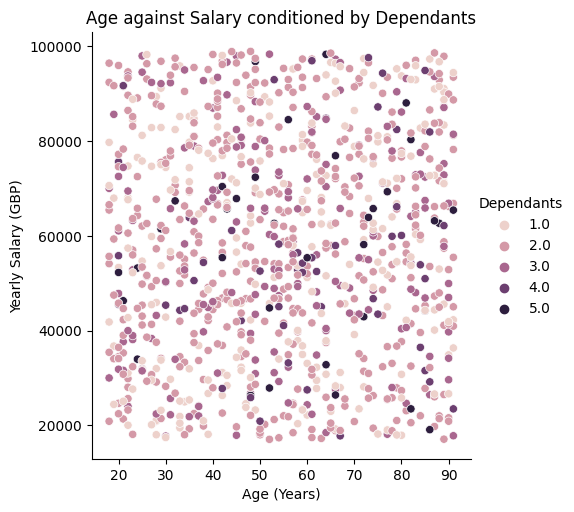

In [33]:
# Plot multivariate graph
Age_salary_dependants_plot = sns.relplot(data = df, x = "Age (Years)", y = "Yearly Salary (GBP)", hue = 'Dependants')

# Add axis labels to the plot
Age_salary_dependants_plot.set_axis_labels(x_var="Age (Years)", y_var="Yearly Salary (GBP)")

# Add a title to the plot
Age_salary_dependants_plot.set(title='Age against Salary conditioned by Dependants')

### Question 4
Your client would like the ability to save the plots which you have produced. Provide 
a Notebook cell which can do this. 

In [34]:
# Creating dictionary to store key (plot name) and value (plot) of the 6 figures
All_plots = {}

# Inserting names and plots into the dictionary
All_plots["./Age_plot.png"] = Age_plot
All_plots["./Dependants_plot.png"] = Dependants_plot
All_plots["./Age_Maritalstatus_plot.png"] = Age_Maritalstatus_plot
All_plots["./Distance_salary_plot.png"] = Distance_salary_plot
All_plots["./Age_salary_plot.png"] = Age_salary_plot
All_plots["./Age_salary_dependants_plot.png"] = Age_salary_dependants_plot

# Iterating through the dictionary to save each plot
for k, v in All_plots.items():
    v.savefig(k)
    print(f"Saved plot: {k}")

Saved plot: ./Age_plot.png
Saved plot: ./Dependants_plot.png
Saved plot: ./Age_Maritalstatus_plot.png
Saved plot: ./Distance_salary_plot.png
Saved plot: ./Age_salary_plot.png
Saved plot: ./Age_salary_dependants_plot.png
